# EN2550 2021: Object Counting on a Convey Belt

### Name: H. D. M. Premathilaka

### Index: 180497C

### Date of Submission: 11/07/2021

In this assignment, you will be counting and tracking the hexagonal nuts on a moving convey belt.

### Let's first import the required libraries

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Let's load and visualize the template image and the convey belt snapshot at a given time.

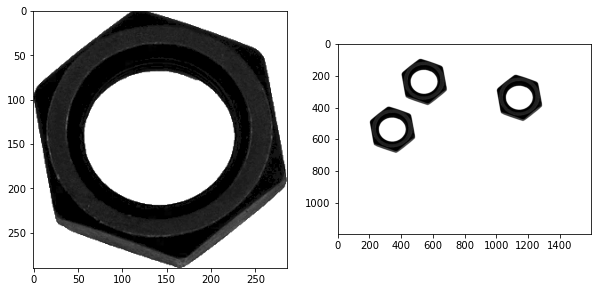

In [2]:
template_im = cv.imread(r'template.png', cv.IMREAD_GRAYSCALE)
belt_im = cv.imread(r'belt.png', cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(template_im, cmap = 'gray')
ax[1].imshow(belt_im, cmap = 'gray')
plt.show()

## Part-I :

### Otsu's Thresholding

Otsu Thresholding is an algorithm which performs automatic thresholding. The threshold is figured out by minimizing the intra-class variance. As an output, the threshold value that separates pixels into two classes will be returned

In [3]:
th_t, img_t = cv.threshold(template_im, 0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
th_b, img_b = cv.threshold(belt_im, 0,255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

print('Otsu threshold for the template image is %d' %th_t)
print('Otsu threshold for the belt image is %d' %th_b)

Otsu threshold for the template image is 138
Otsu threshold for the belt image is 138


### Morphological Closing

Morphological closing is dilation followed by erosion. The objective of morphological closing is to remove small holes in the foreground.

The kernel size used 3 x 3. Instead of using np.ones, openCV's cv.getStructuringElement is used.

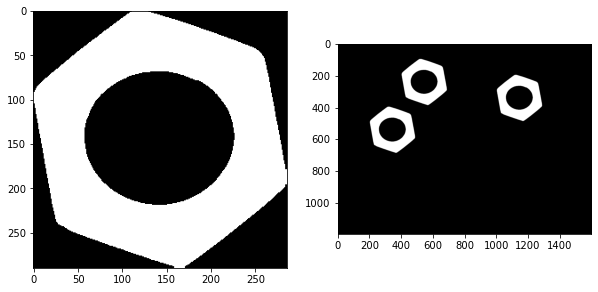

In [4]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
closing_t = cv.morphologyEx(img_t, cv.MORPH_CLOSE, kernel)
closing_b = cv.morphologyEx(img_b, cv.MORPH_CLOSE, kernel)

#Visualizing the images
fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(closing_t, cmap = 'gray')
ax[1].imshow(closing_b, cmap = 'gray')
plt.show()

### Connected Component Analysis

cv.connectedComponentsWithStats returns the no. of connected components, their labels, stats (leftmost coordinate of the bounding box, topmost coordinate of the bounding box, width, height, area) and the coordinates of the centroids of the connected components

In [5]:
retval_t, labels_t, stats_t, centroids_t = cv.connectedComponentsWithStats(closing_t)
retval_b, labels_b, stats_b, centroids_b = cv.connectedComponentsWithStats(closing_b)

#### *a) How many connected components are detected in each image?*

In [6]:
print('No. of connected components detected in the template image is %d' %retval_t)
print('No. of connected components detected in the belt image is %d' %retval_b)

No. of connected components detected in the template image is 2
No. of connected components detected in the belt image is 4


#### *b) What are the statistics? Interpret these statistics.*

The no. of rows in the stats array is equal to the no. of connected components detected in the image. For each component (each row), there will be 5 parameters defining the bounding box.
Those are,  
**1).** Leftmost coordinate of the bounding box (cv.CC_STAT_LEFT)  
**2).** Topmost coordinate of the bounding box (cv.CC_STAT_TOP)  
**3).** The width of the bounding box (cv.CC_STAT_WIDTH)  
**4).** The height of the bounding box (cv.CC_STAT_HEIGHT)   
**5).** The area of the connected component in pixels (cv.CC_STAT_AREA)  

In [7]:
def print_stats(Img_name, stats):
    num_compo = stats.shape[0]
    print('============================================')
    print('Statistics of the connected components in %s' %Img_name)
    print('\n')
    for i in range(num_compo):
        print('Statistics of the connected component %d' %(i+1))
        print('------------------------------------')
        print('Leftmost coordinate of the bounding box is %d' %stats[i,0])
        print('Topmost coordinate of the bounding box is %d' %stats[i,1])
        print('Width of the bounding box is %d' %stats[i,2])
        print('Height of the bounding box is %d' %stats[i,3])
        print('Area (in pixels) of the connected component is %d' %stats[i,4])
        if not i+1 == num_compo:
            print('\n')
    print('============================================')
    print('\n')
        
print_stats('Template image', stats_t)
print_stats('Belt image', stats_b)
        

Statistics of the connected components in Template image


Statistics of the connected component 1
------------------------------------
Leftmost coordinate of the bounding box is 0
Topmost coordinate of the bounding box is 0
Width of the bounding box is 286
Height of the bounding box is 290
Area (in pixels) of the connected component is 42290


Statistics of the connected component 2
------------------------------------
Leftmost coordinate of the bounding box is 0
Topmost coordinate of the bounding box is 0
Width of the bounding box is 286
Height of the bounding box is 290
Area (in pixels) of the connected component is 40650


Statistics of the connected components in Belt image


Statistics of the connected component 1
------------------------------------
Leftmost coordinate of the bounding box is 0
Topmost coordinate of the bounding box is 0
Width of the bounding box is 1600
Height of the bounding box is 1200
Area (in pixels) of the connected component is 1798161


Statistics of the 

#### *c) What are the centroids?*

In [8]:
def print_centroids(Img_name, centroids):
    num_compo = centroids.shape[0]
    print('============================================')
    print('Centroids of the connected components in %s' %Img_name)
    print('\n')
    for i in range(num_compo):
        print('Centroid of the connected component %d is (%d,%d)' %((i+1),centroids[i,0],centroids[i,1]))
    print('============================================')
    print('\n')
        
print_centroids('Template image', centroids_t)
print_centroids('Belt image', centroids_b)

Centroids of the connected components in Template image


Centroid of the connected component 1 is (142,145)
Centroid of the connected component 2 is (142,143)


Centroids of the connected components in Belt image


Centroid of the connected component 1 is (807,614)
Centroid of the connected component 2 is (542,243)
Centroid of the connected component 3 is (1142,343)
Centroid of the connected component 4 is (342,543)




### Contour Analysis

To apply cv.findContours, the object to be found must in white whereas the background must be in black.  
There will be two output arrays.  
1). An array containing the coordinates of the points used to form the contour.  
2). An array containing information about the image topology

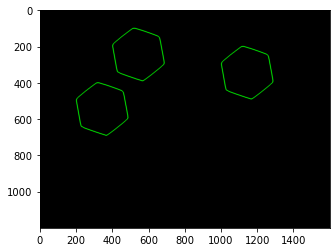

In [9]:
#cv.RETR_TREE - retrieves all contours
#cv.RETR_EXTERNAL - retrieves only the outer contours 
contours_t, hierarchy_t = cv.findContours(closing_t, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours_b, hierarchy_b = cv.findContours(closing_b, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

#Visualizing contours
im_contours_belt = np.zeros((belt_im.shape[0], belt_im.shape[1],3), dtype = np.uint8)
conts = cv.drawContours(im_contours_belt, contours_b,-1, (0,255,0),3).astype('uint8')
plt.imshow(conts)

### Count the number of matching hexagonal nuts in belt.png

cv.matchShapes(contour1, contour2, shape match mode, parameter) is used to compare shapes(contours). This returns a metric whose value inversely reflects the similarity between the two shapes.

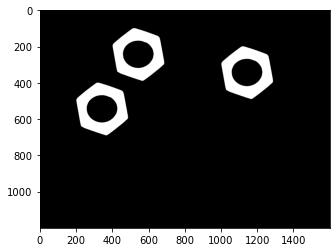

For contour 1, the output is 0.0001007170
For contour 2, the output is 0.0001007170
For contour 3, the output is 0.0001007170


In [10]:
label = 1 #label of the background is 0
#all the pixels except the background pixels are made black
belt = ((labels_b >= label)*255).astype('uint8')

#displaying the image
plt.imshow(belt, cmap='gray')
plt.show()

belt_cont, template_hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
for j,c in enumerate(belt_cont):
    #finding the similairty between the template contour and hexagonal contours on the belt
    print('For contour %d, the output is %.10f' %(j+1, cv.matchShapes(contours_t[0],c,cv.CONTOURS_MATCH_I1, 0.0)))

## Part - II

### Frame tracking through image moments

Area enclosed by a contour is determined using cv.contourArea(contour)

In [11]:
#finding the contour area of contour_b[1]
ca = cv.contourArea(contours_b[1])
print('Contour area is %.2f' %ca)

Contour area is 60059.50


Certain parameters such as the contour area and the coordinates of the centroid of the contour can be found out using cv.moments(contour)

In [12]:
M = cv.moments(contours_b[1])
#finding the coordinates of the centroid
cx, cy = int(M['m10']/M['m00']), int(M['m01']/M['m00'])
print('Coordinates of the centroid are (%d,%d)' %(cx,cy))

Coordinates of the centroid are (1142,343)


Make a variable called count to represent the number of contours and set it to the value 1. Make an np array [cx, cy, ca, count] and name this as object_prev_frame.

In [13]:
count = 1
object_prev_frame = np.array([cx, cy, ca, count])

Similarly, you can create the object_curr_frame(to describe the current values) and define the threshold delta_x to check whether the corresponding element of both the object_curr_frame and object_prev_frame are less than the delta_x. You can set delta_x as 15 or so. (Here the delta_x can be thought of as the movement of the cx from frame to frame)

In [14]:
delta_x = 15

## Part - III

### 1. Implement the function `get_indexed_image`, which takes an image as the input, performs thresholding, closing and connected component analysis and return retval, labels, stats, centroids.(Grading)

In [15]:
def get_indexed_image(im):
    """ Thresholding, closing, and connected component analysis lumped
    """
    #Thresholding
    otsu_thresh, im_thresh = cv.threshold(im, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    
    #Closing
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
    closing_im = cv.morphologyEx(im_thresh, cv.MORPH_CLOSE, kernel)
    
    #Connected Component Analysis
    retval, labels, stats, centroids = cv.connectedComponentsWithStats(closing_im)
    
    return retval, labels, stats, centroids
    

### 2. Implement the function `is_new` which checks the dissimilarity between 2 vectors. (Grading)

In [16]:
def is_new(a, b, delta, i):
    """ Vector Dissimilarity with an Array of Vectors
    Checks if vector b is similar to a one or more vectors in a outside the tolerances specified in delta. 
    vector i specifies which elements in b to compare with those in a. 
    """
    #Broadcasting
    abs_diff = np.abs(a-b)
    
    for val in i:
        #checking the ith entry in each row
        state = (abs_diff[:,val] > delta[val])
        state = np.all(state)
        if state == False:
            return state
        
    return state         

In [17]:
# check is_new  expected answer False

a = np.array([[1.36100e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00],
 [7.61000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00],
 [1.55200e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]])
b = np.array([7.51000e+02, 4.53000e+02, 5.99385e+04, 3.00000e+00])
delta = np.array([delta_x])
i = np.array([0])

assert is_new(a, b, delta, i) == False, " Check the function "

## 3. If the array `a` is in the shape of (number of nuts, len(object_prev_frame)) (i.e. array a is made by stacking all the `object_prev_frame` for each frame.) If b is in the form [cx, cy, ca, count], write the function `prev_index` to find the index of a particular nut in the previous frame. (Grading)

In [18]:
def prev_index(a, b, delta, i):
    """ Returns Previous Index
    Returns the index of the apppearance of the object in the previous frame.
    (See the example in the next cell)
    """
    index = -1
    abs_diff = np.abs(a-b)
    for val in i:
        #finding the matches from the prev_frame
        state = (abs_diff[:,val] <= delta[val])
        
        #finding the index
        indices = [j for j,c in enumerate(state) if c]
    
        row = a[indices[0]]
        index = row[-1]
    return index

In [19]:
# check prev_index  expected answer 1
a = np.array([[1.36100e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00],
 [7.61000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00],
 [1.55200e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]])
b = np.array([7.51000e+02, 4.53000e+02, 5.99385e+04, 3.00000e+00])
delta = np.array([delta_x])
i = np.array([0])

assert prev_index(a,b,delta,i) == 1, " Check the function "

#### Accessing each frame of a video

In [20]:
cap = cv.VideoCapture('conveyor_with_rotation.mp4') 
while cap.isOpened(): 
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    cv.namedWindow('Frame', cv.WINDOW_AUTOSIZE)
    cv.imshow('Frame', frame)
    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...


## 4. Implement a code to detect hexagonal nuts in a moving convey belt (Grading)

### Steps:


1. Use the above code snippet to access each frame and remember to convert the frame into grey scale. Name the variable as `grey` 
2. Call `get_indexed_image` and extract `retval, labels, stats, centroids.`
3. Find contours of all nuts present in a given frame of the belt.
4. Initiate a 3-D array with zeros to draw contours. Call this `im_contours_belt`
5. Draw each contour. Use `cv.drawContours`

### Object Detection and Tracking

For each contour of the belt frame,

1. Use `is_new` and `prev_index` functions to track each frame and get the indices of each nut.
2. Write a code to detect and track hexagonal nuts in each frame.
3. You may refer, annotation to understand how to add texts and labels to each frame. 

In [21]:
#To store grayscale images(frames)
frames = []
#To store color frames
colored = []
cap = cv.VideoCapture('conveyor_with_rotation.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    #appending the frames after converting to grayscale
    grey = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frames.append(grey)
    colored.append(frame)
    
    cv.namedWindow('Frame', cv.WINDOW_AUTOSIZE)
    cv.imshow('Frame', frame)
    
    if cv.waitKey(1) == ord('q'):
        break
        
cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...


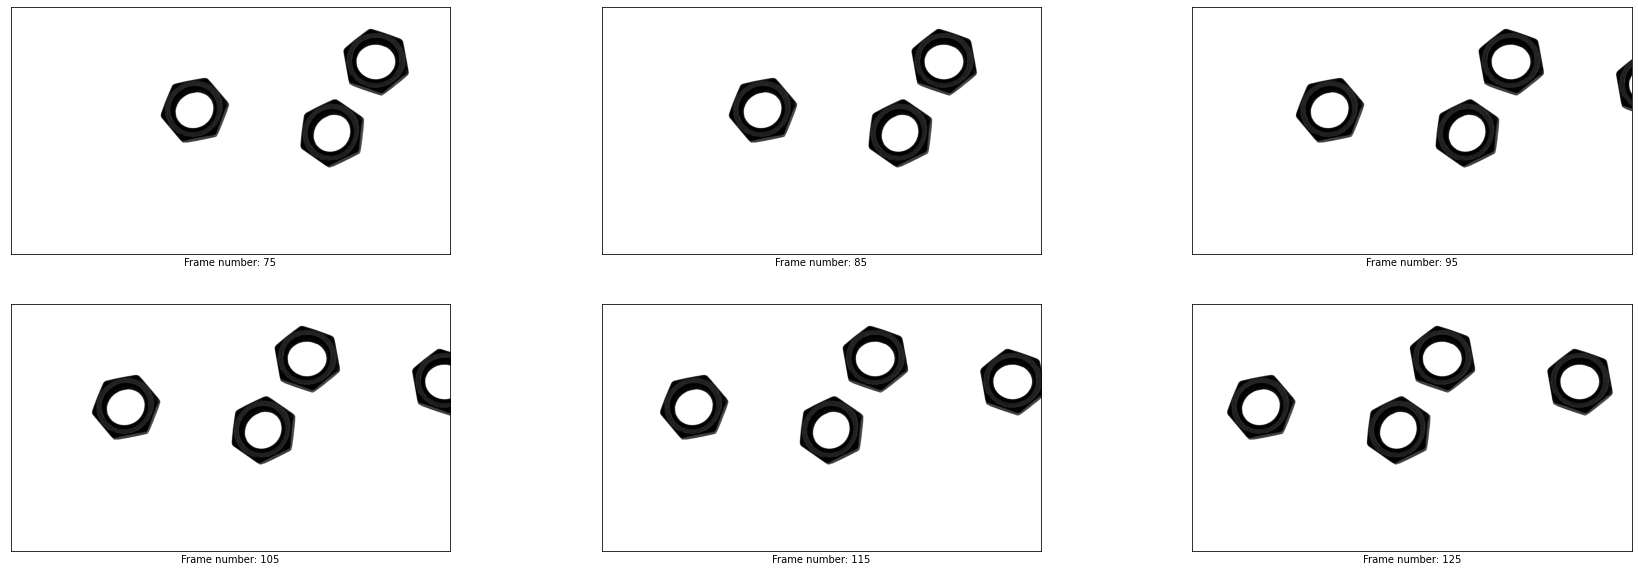

In [22]:
#Let's see if the grayscale images are captured
plt.figure(figsize = (30,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(frames[75 + 10*i], cmap = 'gray')
    plt.xticks([]), plt.yticks([])
    plt.xlabel("Frame number: %d" %(75 + 10*i))
plt.show()

In [23]:
#let's determine the set of contours and the contour plots for each frame.
#To store contours
cont_coord = []
#To store image plots
cont_imgs = []

label = 1

for frame in frames:
    retval, labels, stats, centroids = get_indexed_image(frame)
    #the background label is zero
    #we will make all the pixels except the background pixels white
    belt = ((labels >= label)*255).astype('uint8')
    cont_belt, hierarchy_belt = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    #cont_belt contais the coordinates that make up the contour
    cont_coord.append(cont_belt)
    
    #drawing the contours
    im_contours_belt = np.zeros((belt.shape[0], belt.shape[1],3),dtype = np.uint8)
    cont_img = cv.drawContours(im_contours_belt, cont_belt, -1, (0, 255, 0),4).astype('uint8')
    cont_imgs.append(cont_img)
    

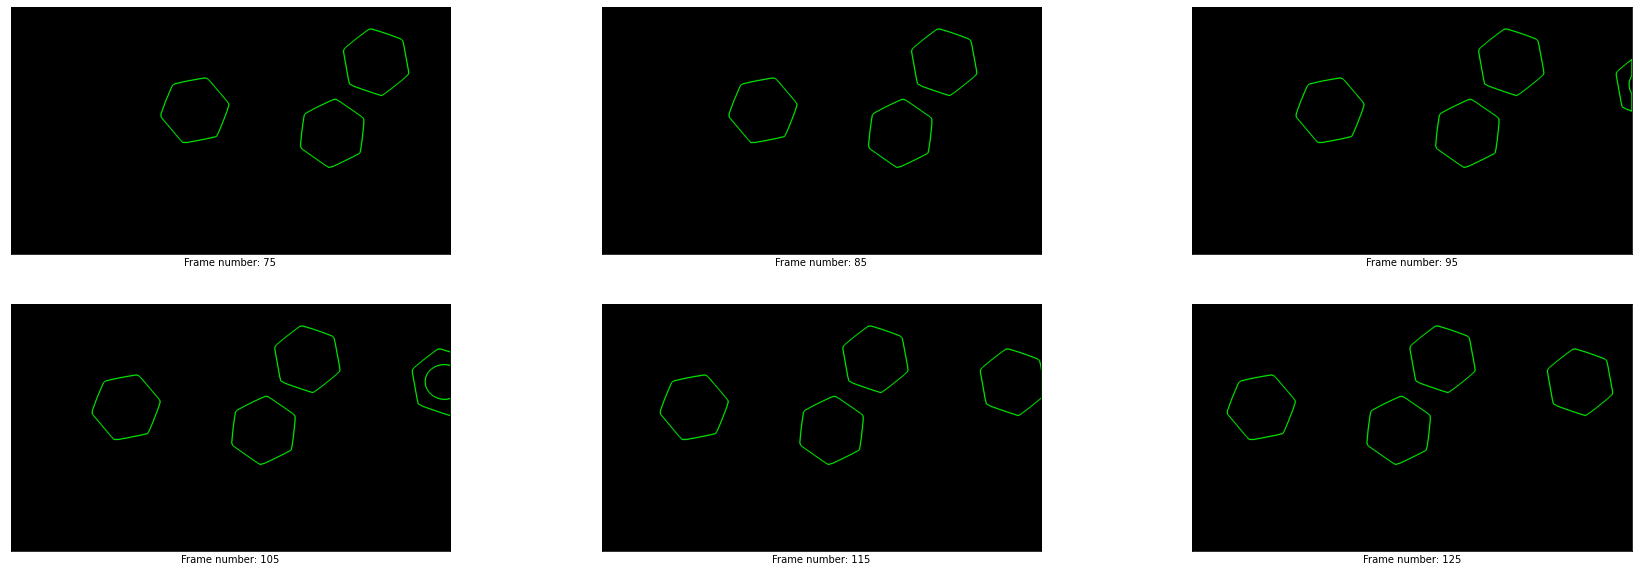

In [24]:
#Now let's visualize the contour plots of the frames visualized before
plt.figure(figsize = (30,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(cont_imgs[75 + 10*i], cmap = 'gray')
    plt.xticks([]), plt.yticks([])
    plt.xlabel("Frame number: %d" %(75 + 10*i))
plt.show()

In [25]:
#Counting the no. of hexagonal nuts in a frame and frame tracking through image moments
all_frames = []
for contours in cont_coord:
    count = 0
    details = []
    for contour in contours:
        thresh = cv.matchShapes(contours_t[0], contour, cv.CONTOURS_MATCH_I1,0.0)
        #Setting the threshold to be 0.4
        if thresh <= 0.4:
            M = cv.moments(contour)
            #contour area
            ca = M['m00']
            #contour centroid coordinates
            cx, cy = int(M['m10']/M['m00']), int(M['m01']/M['m00'])
            count += 1
            details.append(np.array([cx, cy, ca, count]))
    all_frames.append(details)

In [26]:
#Tracking the nuts, continuously
#Finding the no. of nuts in the first frame
nuts_in_the_frame = int(all_frames[0][-1][-1])
prev_frame = all_frames[0]
delta = np.array([15])
i = np.array([0])
#Now we will use is_new and prev_index functions to assign indices to the hexagonal nuts
for num in range(1, len(all_frames)):
    frame = all_frames[num]
    for each_nut in frame:
        if is_new(prev_frame, each_nut, delta, i):
            nuts_in_the_frame += 1
            #if it is a newly appeared nut, we have to assign it an index
            each_nut[-1] = nuts_in_the_frame
        else:
            #if the nut was already there in the previous frame
            index = prev_index(prev_frame, each_nut, delta, i)
            each_nut[-1] = index
    prev_frame = frame

In [27]:
#Annotating the frames
frames_with_annotation = []
num = 0
font = cv.FONT_HERSHEY_SIMPLEX
font_color = (0,0,255)
font_scale = 1
thickness = 3

for gray_frame, color_frame, contours in zip(all_frames, colored, cont_coord):
    #we want to annotate the color frames not the gray frames
    image = color_frame
    vertical = 0
    for each_nut in gray_frame:
        number = str(int(each_nut[-1]))
        cx = int(each_nut[0])
        cy = int(each_nut[1])
        ca = int(each_nut[2])
        new_image = cv.putText(image, number, (cx,cy), font, 2, font_color, thickness)
        new_image = cv.putText(new_image, 'Nut #%d: %4d %4d %.2f' %(int(number),int(cx),int(cy),int(ca)),(75, 1005 - 100*vertical),font, font_scale, font_color, thickness)
        vertical += 1
    new_image = cv.putText(new_image, 'Frame #%d' %num, (1300,1025), font, 2, (255,0,255), thickness)
    new_image = cv.putText(new_image, 'cx',(240,1040), font, 1, (255,0,255),thickness)
    new_image = cv.putText(new_image, 'cy',(335,1040), font, 1, (255,0,255),thickness)
    new_image = cv.putText(new_image, 'ca',(450,1040), font, 1, (255,0,255),thickness)
    #drawing the contours
    new_image = cv.drawContours(new_image, contours,-1, (255,0,0),5).astype('uint8')
    
    #Index Number
    new_image = cv.putText(new_image, '180497C', (50,100), font, 2, font_color, thickness)
    frames_with_annotation.append(new_image)
    num += 1       

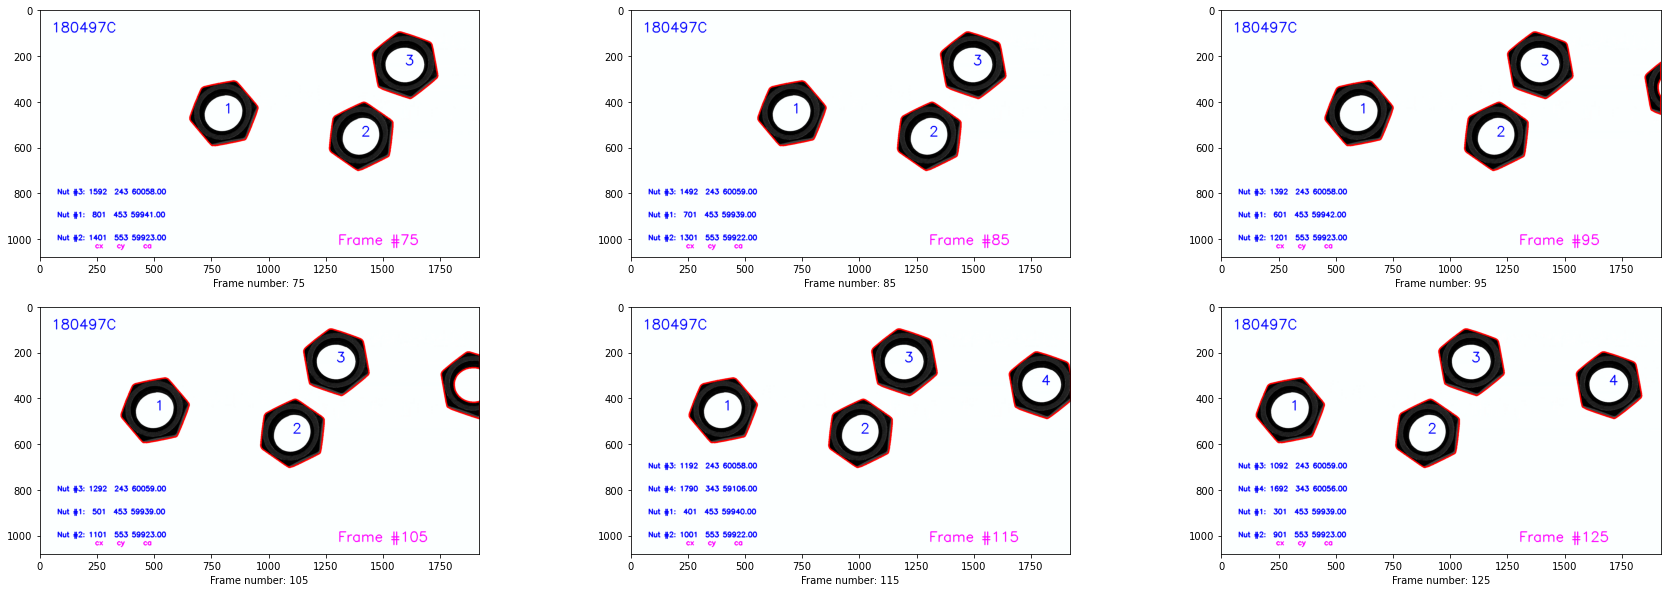

In [28]:
#Now let's visualize the annotated frames
plt.figure(figsize = (30,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(frames_with_annotation[75 + 10*i], cmap = 'gray')
    plt.xlabel("Frame number: %d" %(75 + 10*i))
plt.show()

## Saving the video

In [29]:
video_name = '180497C_en2550_a05.mp4'
#4-char codec compressing the frames
codec = cv.VideoWriter_fourcc(*'MP4V')
#duration of the source video
length = 9 
fps = int(len(frames_with_annotation)/length)
h, w,_ = frames_with_annotation[0].shape
frame_size = (w, h)
#to indicate that the output is coloured.
with_color = True

# Creating the Video Writer object
final_video = cv.VideoWriter(video_name, codec, fps, frame_size, with_color)
for frame in frames_with_annotation:
    final_video.write(frame)
final_video.release()

print('Frame size is (%d,%d)' %(w,h))
print('Frames per second is %d' %fps)

Frame size is (1920,1080)
Frames per second is 31
